# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [178]:
# Импорт библиотек.

import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Считаем данные и сохраним в переменю data.**

In [179]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

**Ознакомимся с данными. Выведем первые 10 строк.**

In [180]:
pd.set_option('display.max_columns', None)

In [181]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Посторим общую гистограмму.**

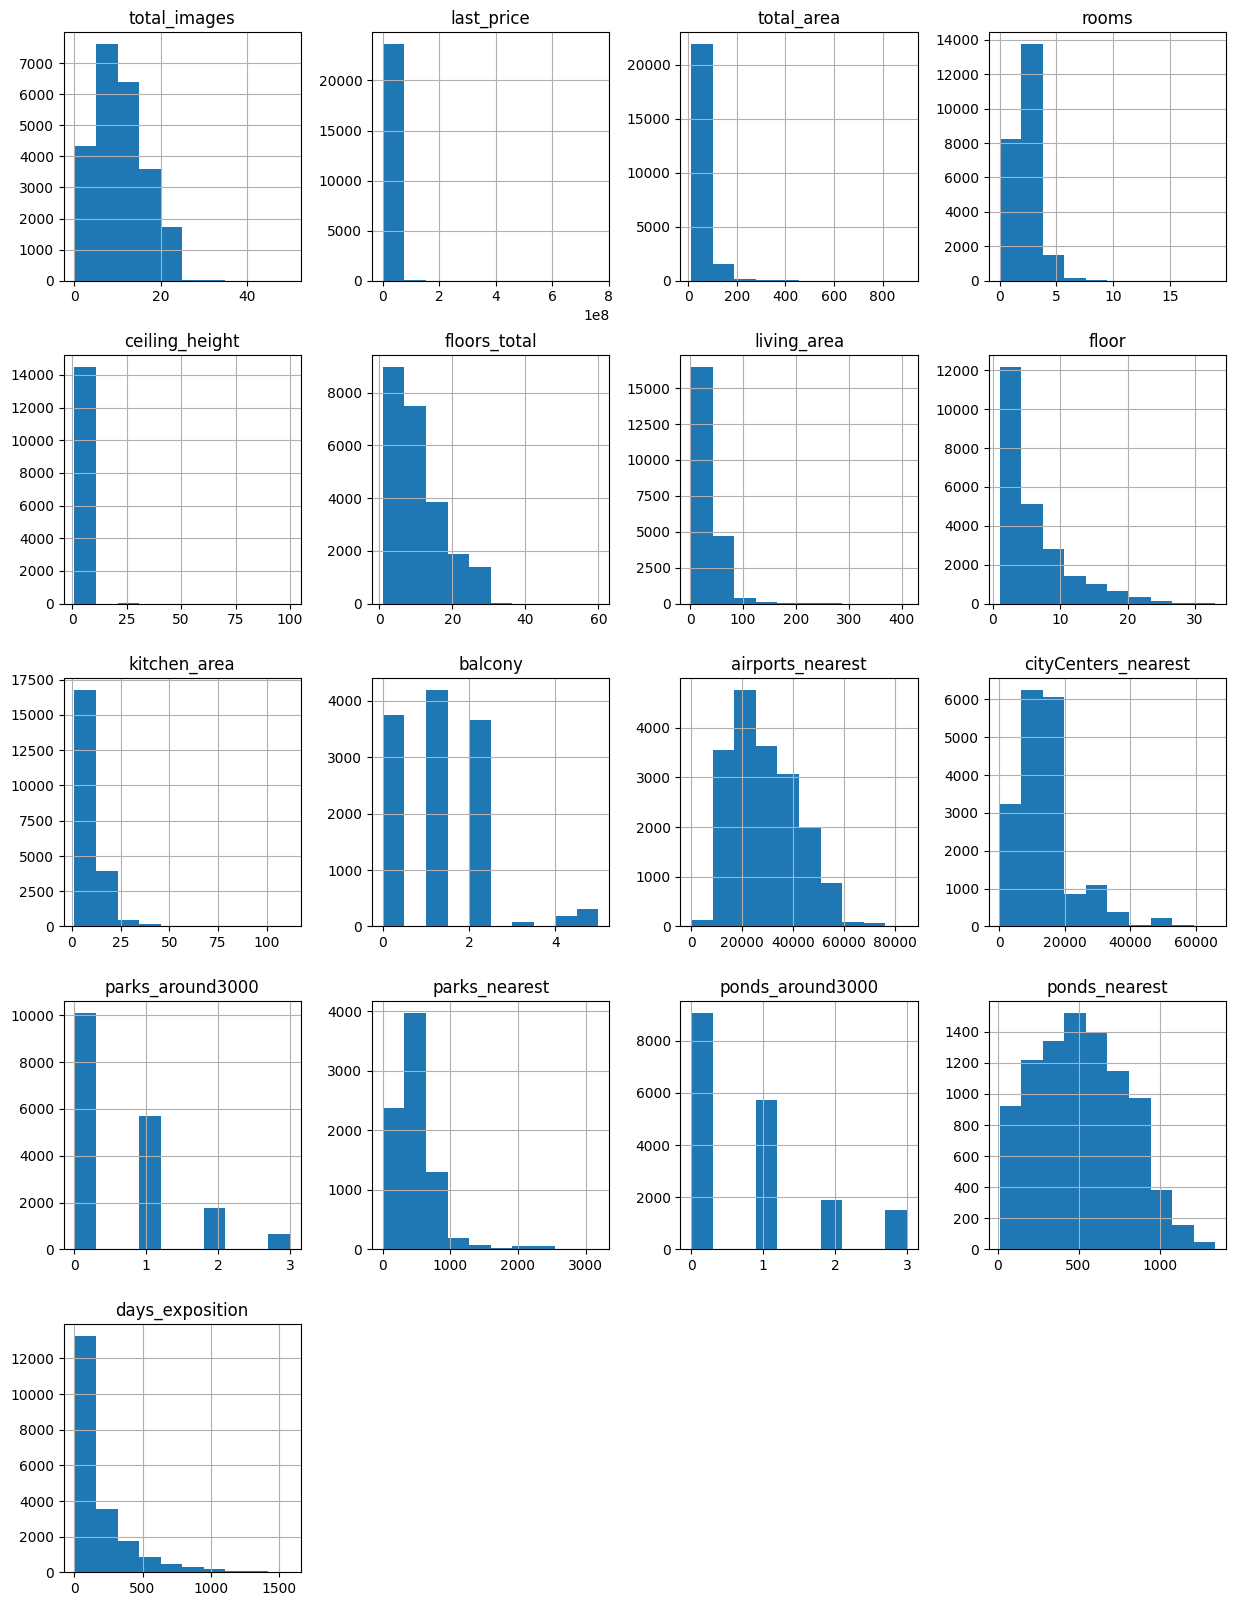

In [182]:
data.hist(figsize=(15,20));

**Выведем основную информацию о датафрейме.**

In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [184]:
data_old = data.shape[0]

In [185]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Описания данных**

* `total_images` — число фотографий квартиры в объявлении
* `last_price` — цена на момент снятия с публикации
* `total_area` — общая площадь квартиры в квадратных метрах (м²)
* `first_day_exposition` — дата публикации
* `rooms` — число комнат
* `ceiling_height` — высота потолков (м)
* `floors_total` — всего этажей в доме
* `living_area` — жилая площадь в квадратных метрах (м²)
* `floor` — этаж
* `is_apartment` — апартаменты (булев тип)
* `studio` — квартира-студия (булев тип)
* `open_plan` — свободная планировка (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `balcony` — число балконов
* `locality_name` — название населённого пункта
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

**Выведем количество пропусков в данных.**

In [186]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Предобработка данных

#### Преобразование столбцов

In [187]:
# Выедем название столбцов.

data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [188]:
# Приведем название столбцов в хороший стиль. 

data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest',
                            'parks_around3000':'parks_around',  'ponds_around3000':'ponds_around'})

#### Заполним пропуски.

* Заменим данные в `balcony`, `parks_around`, `parks_nearest`, `ponds_around`, `ponds_nearest` на 0.

In [189]:
data['balcony'] = data['balcony'].fillna(0)
data['parks_around'] = data['parks_around'].fillna(0)
data['parks_nearest'] = data['parks_nearest'].fillna(0)
data['ponds_around'] = data['ponds_around'].fillna(0)
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)

* Заменим данные в `apartment` на False.

In [190]:
data['is_apartment'] = data['is_apartment'].fillna('False')

* В `kitchen_area` сначала заменим пропуски на 0 относительно `studio`, оставшийся медийным значением.

In [191]:
data.loc[(data['studio'] == True) & (data['kitchen_area'].isna()), 'kitchen_area'] = 0

In [192]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())

* С помощью цикла заменим пропуски `living_area` медийным значением зависящий от `rooms`.

In [193]:
for i in data['rooms'].unique():
    data.loc[(data['rooms'] == i) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == i), 'living_area'].median()

* Удалим пропуски в `locality_name`, `floors_total` т.к. кол-во пропусков не велико.

In [194]:
data = data.dropna(subset=['locality_name'])

In [195]:
data = data.dropna(subset=['floors_total'])

* Заменим пропуски в `ceiling_height` на медийное значение.

In [196]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

#### Изменения типа данных

* В столбцах `balcony`,`last_price`, `floors_total`, `parks_around`, `parks_nearest`, `ponds_around`, `ponds_nearest`, `days_exposition` изменим тип данных с **float64** на целочисленный **int**. Так же измененем в `first_day_exposition` в формат **datetime**.  Для более удобного исследования данных.

In [197]:
for i in data[['balcony', 'last_price', 'floors_total', 'parks_around', 'parks_nearest', 'ponds_around', 'ponds_nearest']]:
    data[i] = data[i].astype('int')

In [198]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d %H:%M:%S')

In [199]:
data['days_exposition'] = np.floor(pd.to_numeric(data['days_exposition'], errors='coerce')).astype('Int64')

#### Уберем аномальные значения

count    23565.000000
mean         2.724530
std          0.991026
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

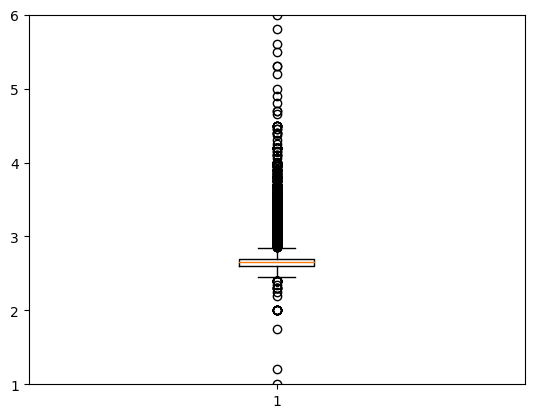

In [200]:
plt.ylim(1, 6)
plt.boxplot(data['ceiling_height']);
data['ceiling_height'].describe()

Для начал отфильтруем с помощью метода `where()`, где потолки выше 20м. будут делиться на 10.

In [201]:
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height']<20, data['ceiling_height']/10)

Теперь сделаем срез, что бы потолки были не выше 3.5м и не ниже 2м с помощью `query`. Т.к Высота потолков в жилых комнатах в 'Сталинках' устанавливалась не ниже 3м, и если возьмём диапазон меньше, потеряем большое количество данных. 

In [202]:
data = data.query('ceiling_height < 3.5 and ceiling_height > 2')

In [203]:
data['ceiling_height'].describe()

count    23140.000000
mean         2.678799
std          0.165711
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.490000
Name: ceiling_height, dtype: float64

Выявим аномальные значения по количеству комнат. 

count    23140.000000
mean         2.048099
std          1.048985
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

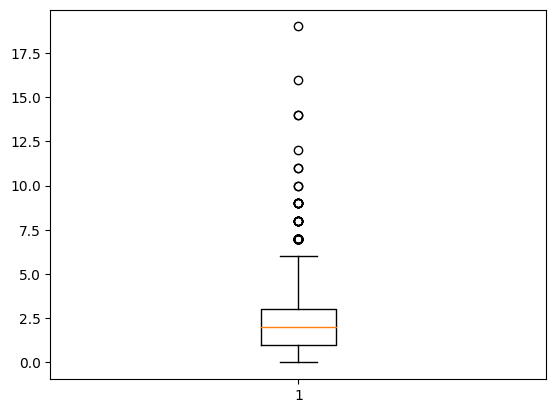

In [204]:
plt.boxplot(data['rooms']);
data['rooms'].describe()

Будем считать что аномальные квартиры где количество комнат превышает 7, сделаем срез.

In [205]:
data.query('rooms <= 7', inplace=True)

Проверим аномальные значения `last_price` и `total_area`. Построим диаграмму рассеяния.

In [206]:
# Переведем в тыс.руб. в last_price.

data['last_price'] = (data['last_price']/1000).astype(int)

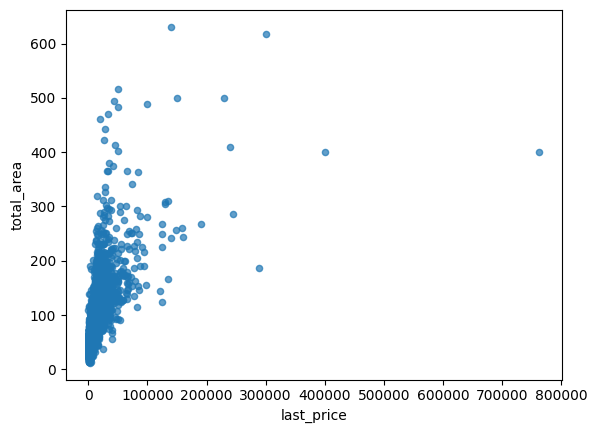

In [207]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.7);

По диаграмме видно что плотное пятно примерно до 11000 тыс.руб. и до 300 кв.м. выведем для каждого диаграмму размаха.

count     23114.000000
mean       6246.550748
std        9664.375576
min          12.000000
25%        3400.000000
50%        4600.000000
75%        6629.500000
max      763000.000000
Name: last_price, dtype: float64

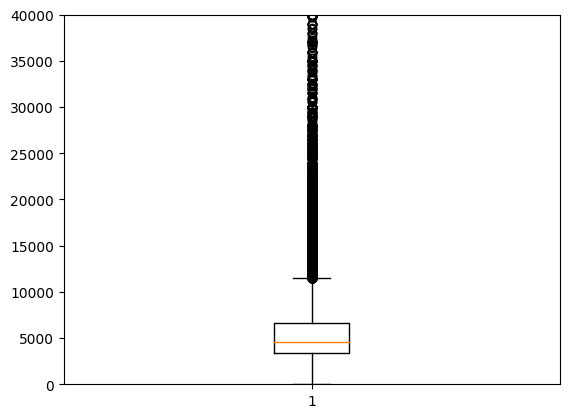

In [208]:
plt.ylim(0, 40000)
plt.boxplot(data['last_price']);
data['last_price'].describe()

По диаграмме наблюдаем, что аномальные значения свыше 12000 тыс.руб. Сделаем срез для `last_price` до 15000 тыс.руб., что бы не потерять большое кол-во данных. 

In [209]:
data = data.query('last_price <= 15000');

Построим диаграмму размаха для `total_area`.

count    22089.000000
mean        54.857399
std         21.515516
min         12.000000
25%         39.300000
50%         50.000000
75%         65.100000
max        320.000000
Name: total_area, dtype: float64

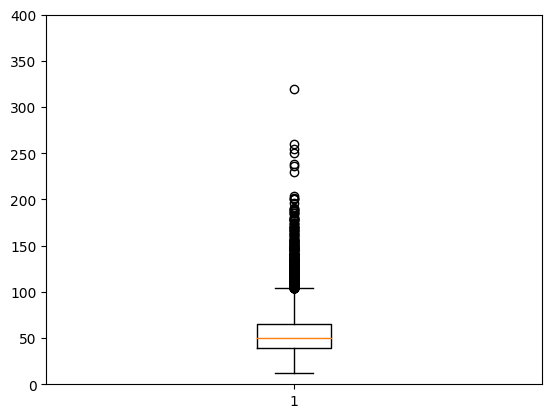

In [210]:
plt.ylim(0, 400)
plt.boxplot(data['total_area']);
data['total_area'].describe()

Видно, что аномальные значения начинаются свыше с 100 кв.м. возьмем срез до 120 кв.м..Так же, что бы не потерять большое кол-во данных.

In [211]:
data = data.query('total_area <= 120');

In [212]:
data_new = data.shape[0]

In [213]:
print('Процент потерянных данных {:.1%}'.format(1 - data_new / data_old))

Процент потерянных данных 7.9%


#### Дубликаты

In [214]:
# Поиск дубликатов.

data.duplicated().sum()

0

In [215]:
#Поиск неявных дубликатов.

data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [216]:
# Скорректируем название в locality_name уберем неявные дубликаты.

data['locality_name'] = data['locality_name'].replace(regex={r'городского типа ': '', 
                                                             'ё': 'е','городской ': '', 'при железнодорожной ': '',
                                                             'коттеджныйпоселок ':'поселок ', 'коттеджный':''})

**Вывод:** И так мы переработали данные избавлись от большенства пропусков. 


 * Заменили данные в `balcony` на 0, т.к. болконы скорей всего не были укзаны в связи с их отсутствием.
 * Так же заменили пропуски на 0 в столбцах `parks_around` и `ponds_around`, возможная причина в отсутсвие данных, ошибка в выгрузке т.к. данные собирались системой. Исходя заменили и пропуски в `parks_nearest` и `ponds_nearest` на 0. 
 * Очень жаль будет потерять 3к данных в `days_exposition`, парамет очень важный для нашего исследования,но у нас еще остается 20к что будет достаточно для анализа, заменили пропуски на 0.
 * Заменили пропуски `living_area` медийным значением зависящий от `rooms`
 * Заменили данные в `apartment` на False. возможно люди не совсем знаю чем отлючается квартира от апартаментов в связи с чем решели не заполнять данные. Заменили на False - не апартаменты.
 * В `kitchen_area` сначала заменили пропуски на 0 относительно `studio`, оставшийся медийным значением.
 * Удалим пропуски в `locality_name`, `floors_total` т.к. кол-во пропусков не велико.
 * Так же приобразовали аномальные значения в столбце `ceiling_height` 
 * Изменили типы данных для более удобного исследования
 * Выявили и убрали не явные дубликаты.
 * Преобразовали название столбцов.
 
* Таже переработали аномальные данные в  `last_price`,`total_area`,`rooms`,`ceiling_height`.

`last_price` - сделали срез до 15 миллион рублей, что является приемлемо для дальнейшего анализа и не теряем в исходных данных.

`total_area` - сделали срез до 120 кв.м. так же для дальнейшего анализа подойдёт.

`rooms` - сделали срез до 7. Свыше 7 комнат аномалий не много, срез будет приемлемый.

`ceiling_height` - сильнее всего влияет на потерю данных. Так что со срезом работали более аккурато. Срез был сделан с 2м. до 3.5м.

**Процент потерянных данных составил 7.9%**

### Посчитайте и добавьте в таблицу новые столбцы

* Цена квадратного метра.

In [217]:
data['price_sqm'] = data['last_price'] / data['total_area']

* День недели, месяц, год. Публикации объявления

In [218]:
#Используя Datatime создадим столбцы weekday, month, year.

data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [219]:
#Сделаем словарь с днями недели.

weekdays = {0: "Понедельник",
            1: "Вторник",
            2: "Среда",
            3: "Четверг",
            4: "Пятница",
            5: "Суббота",
            6: "Воскресенье"}

In [220]:
#Передадим в day_weekdays с помощью map.

day_week = data['weekday'].map(weekdays)

Сделаем тоже самое и для месяца.

In [221]:
month_name = {1:"янв", 2:"февр", 3:"март", 4:"апр",
             5:"май", 6:"июнь", 7:"июль", 8:"авг",   
             9:"сент", 10:"окт", 11:"нояб", 12:"дек"}

In [222]:
date_month_name = data['month'].map(month_name)

* Тип этажа квартиры («первый», «последний», «другой»)

In [223]:
# Напишим функцию категоризации по этажам.

def floor_type(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'

In [224]:
#Применим метод apply.

data['floor_type'] = data.apply(floor_type, axis = 1)

* Приведем расстояние до центра в км. 

In [225]:
data['city_centers_nearest'] = round(data['city_centers_nearest'] / 1000)

In [226]:
data['city_centers_nearest'] = np.floor(pd.to_numeric(data['city_centers_nearest'], errors='coerce')).astype('Int64')

### Проведите исследовательский анализ данных

#### Выведем гистограммы для каждего параметра.
   
* Для построения гистограм будем использовать функцию **plot()**, с параметром **hist**, так же выделим границы линии с помощью **edgecolor** или **ec='black'** и изменим цвет заливки **facecolor** или **fc='cornflowerblue'**.

**Гистограмма общей площади.**

count    21830.000000
mean        53.792595
std         19.047894
min         12.000000
25%         39.000000
50%         50.000000
75%         64.600000
max        120.000000
Name: total_area, dtype: float64

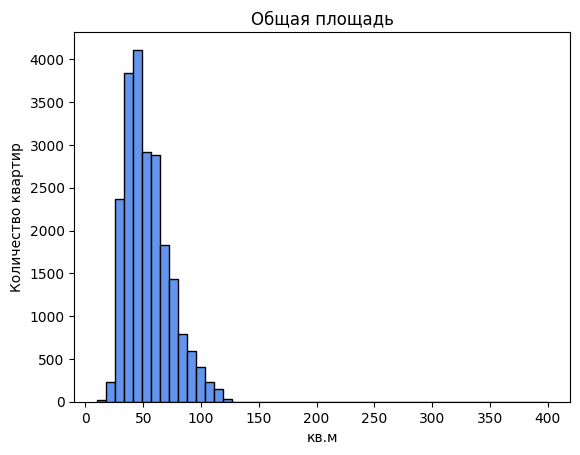

In [227]:
data['total_area'].plot.hist(bins = 50, range=(10, 400), ec='black', fc='cornflowerblue');
plt.title('Общая площадь');
plt.ylabel('Количество квартир');
plt.xlabel('кв.м');

data['total_area'].describe()

Ранее по общей площади мы делали срез. На текущей диаграмме мы наблюдаем, что чаще всего мы встречаем квартиры площадью 50 кв.м.

**Гистограмма жилой площади.**

count    21830.000000
mean        30.768230
std         13.400118
min          2.000000
25%         18.000000
50%         29.900000
75%         40.000000
max        145.000000
Name: living_area, dtype: float64

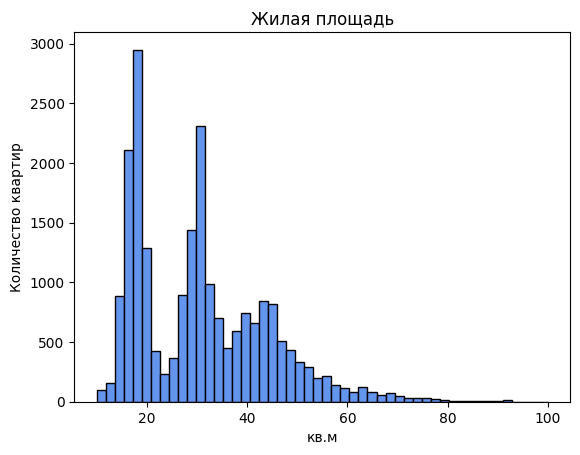

In [228]:
data['living_area'].plot.hist(bins = 50, range=(10, 100), ec='black', fc='cornflowerblue');
plt.title('Жилая площадь');
plt.ylabel('Количество квартир');
plt.xlabel('кв.м');

data['living_area'].describe()

По жилой площади выделяются 3 столбца: 18, 30  45 кв.м..  Жилая площадь зависит от кол-во комнат, а размеры комнат обычно стандартизированы. 

**Гистограмма площади кухни.**

count    21830.000000
mean         9.621916
std          3.951276
min          0.000000
25%          7.000000
50%          9.010000
75%         11.000000
max         64.000000
Name: kitchen_area, dtype: float64

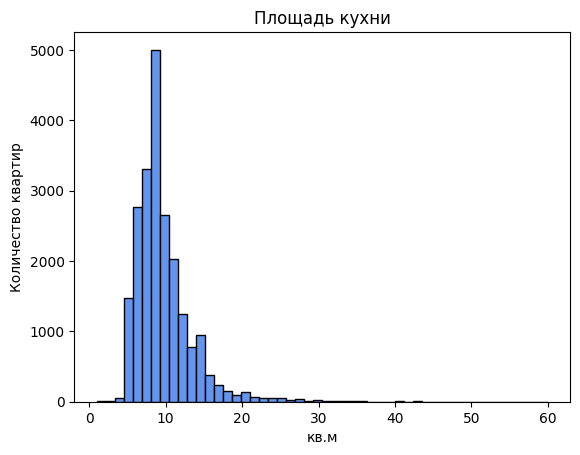

In [229]:
data['kitchen_area'].plot.hist(bins = 50, range=(1, 60), ec='black', fc='cornflowerblue');
plt.title('Площадь кухни');
plt.ylabel('Количество квартир');
plt.xlabel('кв.м');

data['kitchen_area'].describe()

Обычный план расстановки мебели в кухне 9 кв.м., что мы и наблюдаем на нашем графике.

In [230]:
good_total_area = data.query('total_area < 200')

**Гистограмма цена объекта**<a id='million_last_price'></a>

count    21830.000000
mean      5035.473385
std       2572.246005
min         12.000000
25%       3349.250000
50%       4480.000000
75%       6150.000000
max      15000.000000
Name: last_price, dtype: float64

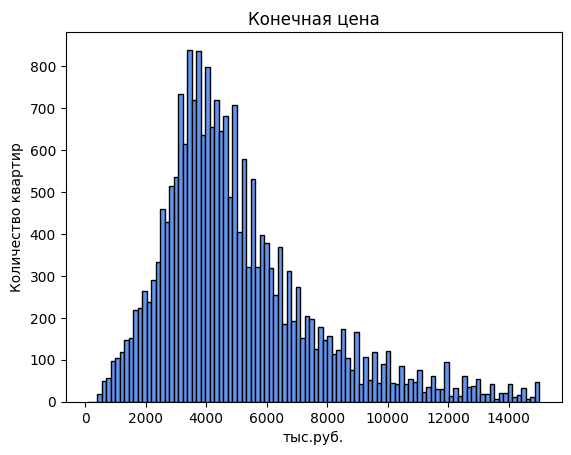

In [231]:
data['last_price'].plot.hist(bins = 100, range=(100, 15000),ec='black', fc='cornflowerblue');
plt.title('Конечная цена');
plt.ylabel('Количество квартир');
plt.xlabel('тыс.руб.');
data['last_price'].describe()

По графику наблюдаем, что цена в среднем от 3000 тыс.руб до 6000 тыс.руб. в данном диапазоне больше всего объявлений.

**Гистограмма количество комнат**

count    21830.000000
mean         1.941319
std          0.903514
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

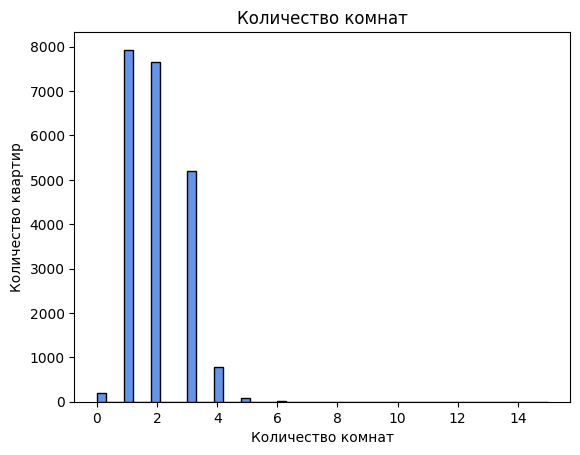

In [232]:
data['rooms'].plot.hist(bins = 50, range=(0, 15), ec='black', fc='cornflowerblue');
plt.title('Количество комнат');
plt.ylabel('Количество квартир');
plt.xlabel('Количество комнат');

data['rooms'].describe()

На данном графике мы видет что приобладет больше всего объявлений с одно двух и трех комнатами, стандарт застройки.

**Гистограмма по высоте потолков**

count    21830.000000
mean         2.666765
std          0.151529
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.490000
Name: ceiling_height, dtype: float64

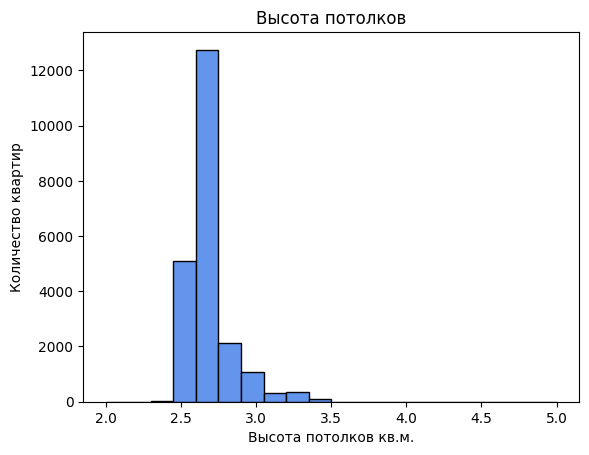

In [233]:
data['ceiling_height'].plot.hist(bins = 20, range=(2, 5), ec='black', fc='cornflowerblue');
plt.title('Высота потолков');
plt.ylabel('Количество квартир');
plt.xlabel('Высота потолков кв.м.');

data['ceiling_height'].describe()

По высоте потолков так же был срез, а по графику у нас от 2.5 до 3 метров высота потолка, и выделяется 2.6 м. Ну и так же по стадару обычно это значение находится в пределах 2,5-2,7 метра.

**Гистограмма по этажу квартиры**

count    21830.000000
mean         5.929134
std          4.918249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

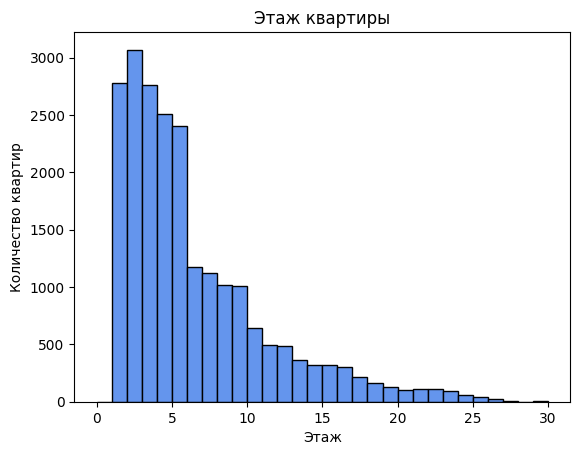

In [234]:
data['floor'].plot.hist(bins = 30, range=(0, 30), ec='black', fc='cornflowerblue');
plt.title('Этаж квартиры');
plt.ylabel('Количество квартир');
plt.xlabel('Этаж');

data['floor'].describe()

Представленные квартиры в объявлениях чаще всего до 5 этажа, больше выделяются квартиры на 2 этаже. 

**Гистограмма по типу этажа**

In [235]:
# Посчитаем количество квартир по каждому типу.

count_floor_type= data['floor_type'].value_counts()

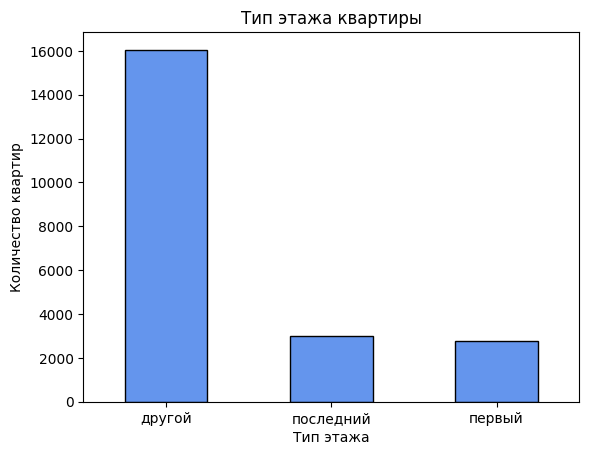

In [236]:
count_floor_type.plot(y = count_floor_type, x ='floor_type', kind="bar", rot=0, ec='black', fc='cornflowerblue');
plt.title('Тип этажа квартиры');
plt.ylabel('Количество квартир');
plt.xlabel('Тип этажа');

Вывод по данному графику очевиден на первых и последних этаже объявлений поровну, ну больше всего представлено "других" этажей.

**Гистограмма по количеству этажей в доме.**

count    21830.000000
mean        10.862437
std          6.649342
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

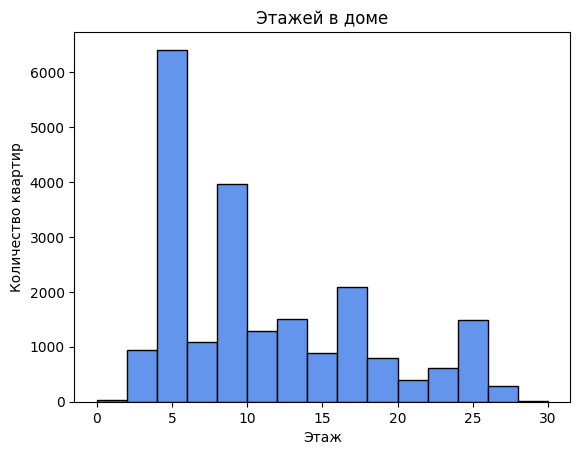

In [237]:
data['floors_total'].plot.hist(bins = 15, range=(0, 30), ec='black', fc='cornflowerblue');
plt.title('Этажей в доме');
plt.ylabel('Количество квартир');
plt.xlabel('Этаж');

data['floors_total'].describe()

По кол-ву - этажей же выделяется стандартная застройка 4-5 этажей "Сталинка" "Хрущевка". Кол-во объявлений превышает 6000. Чуть меньше - около 4000 объявлений «панельки» с 9 этажами, но все ровно выделяются на нашем графике.

**Гистограмма расстояния до центра города.**

count      16396.0
mean     14.854416
std       8.458273
min            0.0
25%           11.0
50%           14.0
75%           17.0
max           66.0
Name: city_centers_nearest, dtype: Float64

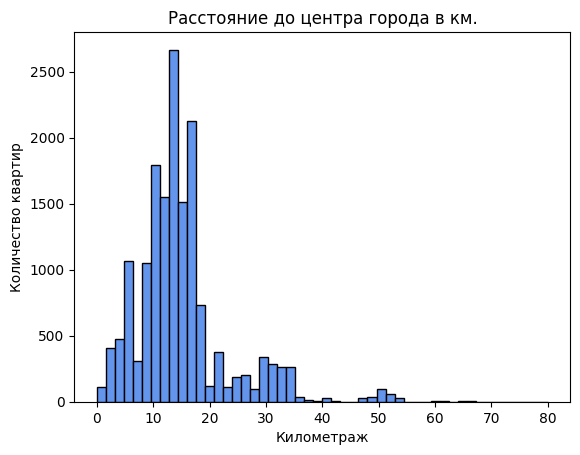

In [238]:
data['city_centers_nearest'].plot.hist(bins = 50, range=(0, 80), ec='black', fc='cornflowerblue');
plt.title('Расстояние до центра города в км.');
plt.ylabel('Количество квартир');
plt.xlabel('Километраж');

data['city_centers_nearest'].describe()

Большинство объявлений в черте города. В среднем около 16 км до центра.

**Гистограмма расстояния до ближайшего аэропорта.**

In [239]:
#Переведем растояние до ближайшего аэропорта в км.

km_airports_nearest = data['airports_nearest'] / 1000

count    16381.000000
mean        28.930478
std         12.951639
min          0.000000
25%         18.052000
50%         27.231000
75%         37.636000
max         84.869000
Name: airports_nearest, dtype: float64

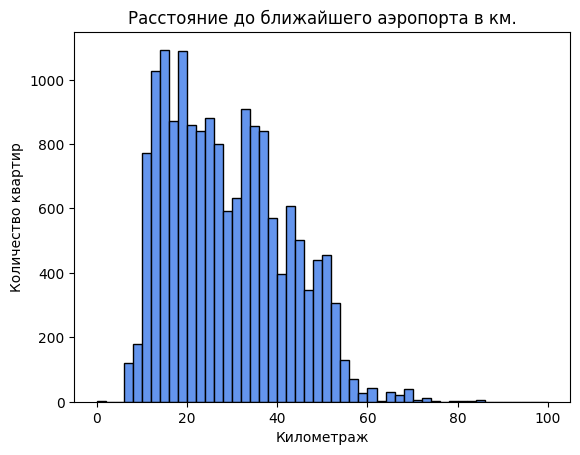

In [240]:
km_airports_nearest.plot.hist(bins = 50, range=(0, 100), ec='black', fc='cornflowerblue');
plt.title('Расстояние до ближайшего аэропорта в км.');
plt.ylabel('Количество квартир');
plt.xlabel('Километраж');

km_airports_nearest.describe()

В среднем расстояние до аэропорта у большинства объявлений 25 км, ну есть и объявления где до аэродрома до 37 км.

**Гистограмма расстояния до ближайшего парка.**

In [241]:
km_parks_nearest = data['parks_nearest'] / 1000

count    21830.000000
mean         0.155441
std          0.297654
min          0.000000
25%          0.000000
50%          0.000000
75%          0.255750
max          3.190000
Name: parks_nearest, dtype: float64

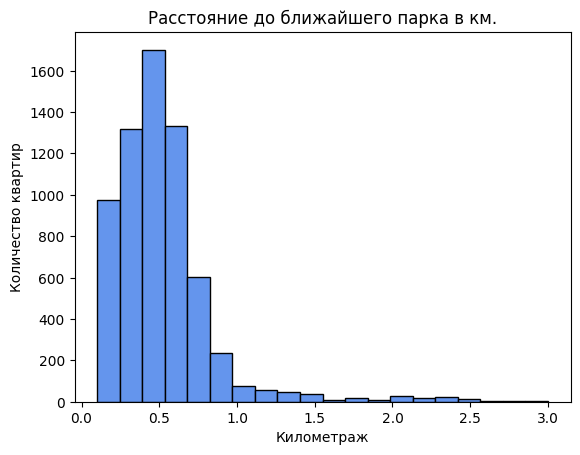

In [242]:
km_parks_nearest.plot.hist(bins = 20, range=(0.1, 3), ec='black', fc='cornflowerblue');
plt.title('Расстояние до ближайшего парка в км.');
plt.ylabel('Количество квартир');
plt.xlabel('Километраж');

km_parks_nearest.describe()

Большинство парков наводиться в радиусе полукилометре от объекта.

**Гистограмма по дням и месяцам публикации объявления**

count    21830.000000
mean         2.573385
std          1.794188
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64

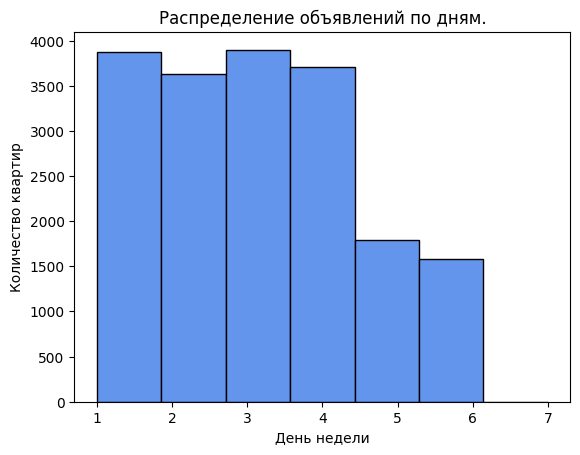

In [243]:
data['weekday'].plot.hist(bins = 7, range=(1, 7), ec='black', fc='cornflowerblue');
plt.title('Распределение объявлений по дням.');
plt.ylabel('Количество квартир');
plt.xlabel('День недели');

data['weekday'].describe()

Чаще всего объявления публикуют в будние дни. Обычно в выходные дни люди предпочитаю отдыхать не желе заниматься делами.

**Найдем медиану и среднее время продаж по `days_exposition`, так же построим гистограмму, посмотрим, как быстро продавались квартиры.** <a id='intro'></a>

Мейдиное время продажи = 92.0 Среднее время продажи =  174.0031910441515


count       19116.0
mean     174.003191
std      212.424538
min             1.0
25%            44.0
50%            92.0
75%           220.0
max          1580.0
Name: days_exposition, dtype: Float64

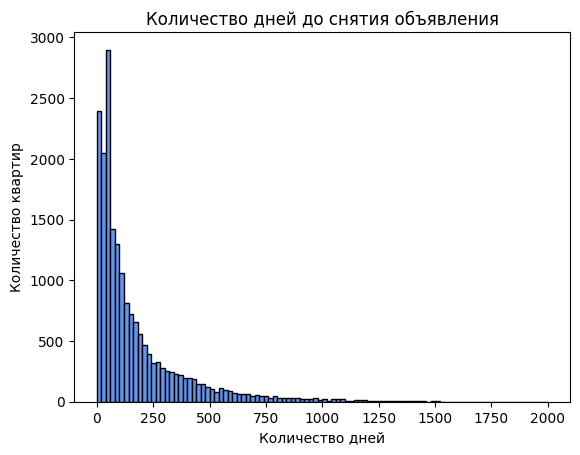

In [245]:
data['days_exposition'].plot.hist(bins = 100, range=(1, 2000), ec='black', fc='cornflowerblue');
plt.title('Количество дней до снятия объявления');
plt.ylabel('Количество квартир');
plt.xlabel('Количество дней');

print('Мейдиное время продажи =', data['days_exposition'].median(), 
      'Среднее время продажи = ', data['days_exposition'].mean())
data['days_exposition'].describe()

При рассмотрение данной гистограммы можно сказать, что квартиры продаются в среднем за 100 дней, так же есть квартиры которые продавались 1580 дней. Попробуем уменьшить область дней до медийног 73 округлим до 100.

count       19116.0
mean     174.003191
std      212.424538
min             1.0
25%            44.0
50%            92.0
75%           220.0
max          1580.0
Name: days_exposition, dtype: Float64

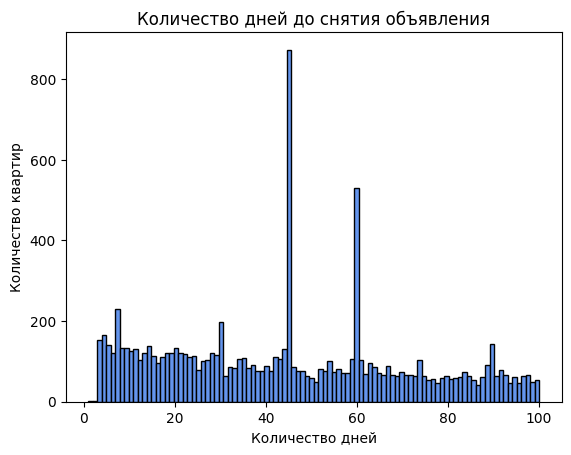

In [246]:
data['days_exposition'].plot.hist(bins = 100, range=(1, 100), ec='black', fc='cornflowerblue');
plt.title('Количество дней до снятия объявления');
plt.ylabel('Количество квартир');
plt.xlabel('Количество дней');
data['days_exposition'].describe()

Теперь мы видим, что сильно выделяются 45, 60 и 90 день и так же не значительно 15, 30 и 75. Скорей всего, в эти дни предлогаю снять или продлить объявления. Т.к. у нас архив объявлений за несколько лет сложно проверить данные.


На текущий момент на сайте сроки другие - [Яндекс Справка](https://yandex.ru/support/realty/paid.html#paid).

**Вывод по гистограммам:** И так как показываю нам графики, в среднем мы видим объявления одно-двухкомнатных-квартир с общей площадью 30-50 кв.м., с жилой площадью 18-30 кв.м., площади кухонь 9 кв.м. и высота потолков в 2.6 м. Квартиры при этом находятся чаще всего в пятиэтажных домах. Чуть меньше объявлений в девятиэтажных домах. Больше всего квартир на этажах "других". В радиусе полукилометра от домов располагаются парки. До центра города в среднем 16 км, а до аэродрома-25км. Стоимость квартир варьируется от 3000 до 6000 тыс.руб

Объявления обычно публикуют на сайт в будние дни, и продолжительность до снятия 45, 60 и 90 дней диктуются правилами сайта.

#### Посмотрим какие факторы больше всего влияют на общую (полную) стоимость объекта.

##### Построим графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки будем использовать сводные таблицы.

  - общей площади;
  - жилой площади;
  - площади кухни;
  - количество комнат;
  - типа этажа, на котором расположена квартира (первый, последний, другой);
  - даты размещения (день недели, месяц, год);


**Познакомимся поближе с ценами на квартиры в Питере и его областях.**

Построим диаграмму размаха для `last_price`.

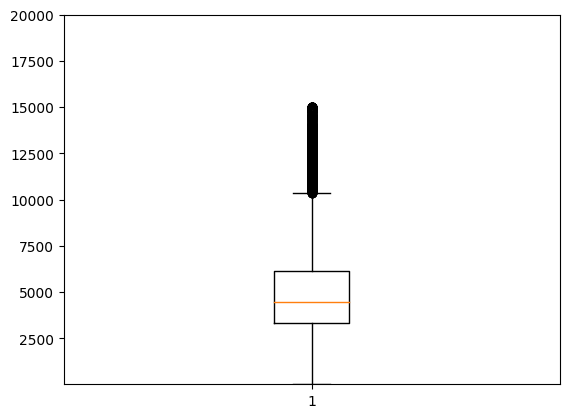

In [247]:
plt.boxplot(data['last_price'])
plt.ylim(10,20000);

Подкрепим диаграмму цифрами выведем `describe`.

In [248]:
data['last_price'].describe()

count    21830.000000
mean      5035.473385
std       2572.246005
min         12.000000
25%       3349.250000
50%       4480.000000
75%       6150.000000
max      15000.000000
Name: last_price, dtype: float64

Можно увидить, что большая часть  значений в диапозоне до 6150 тыс.руб. Так же 1-й квартиль начинается от 3349 тыс.руб..
Т.к был срез, максимальное значение ограничивается 15000 тыс.руб.

* Построим график зависимость цены от общей площади.

Корреляцию Пирсона: 0.7289740750477388


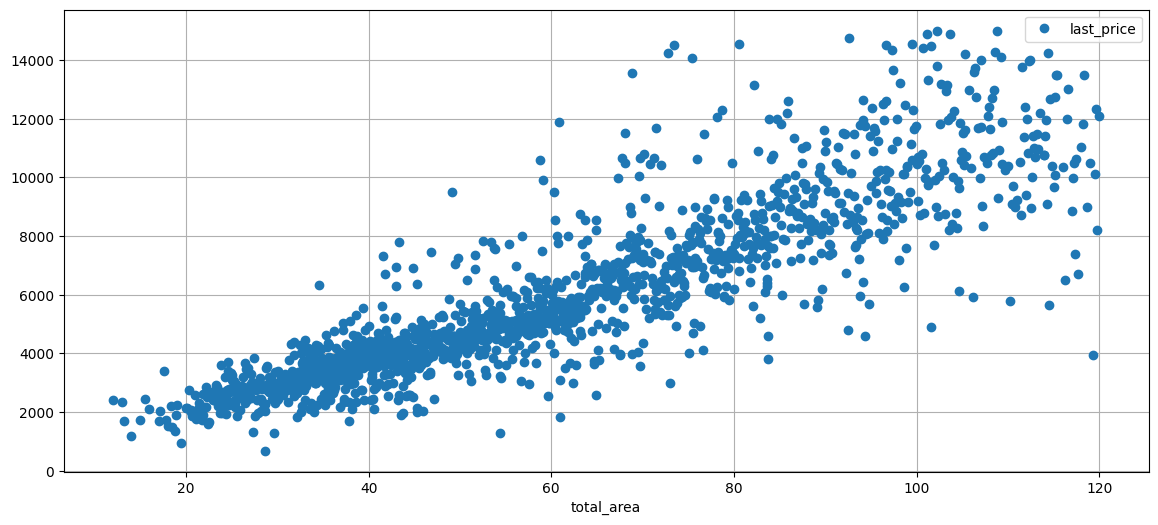

In [249]:
data_pivot = data.pivot_table(index='total_area', values='last_price')
data_pivot.plot(grid=True, figsize=(14, 6), style='o');

#Выведем корреляцию Пирсона. Проверим взаимосвязь.

print('Корреляцию Пирсона:', data['total_area'].corr(data['last_price']))

**Вывод:** Как по графику, так и по корреляции Пирсона видно, что взаимосвязь есть. Это и понятно. Чем больше площадь, тем дороже стоит квартира. Хотя в начале графика она не значительна. Возможно, влияет расстояния до центра города.

* Построим график зависимость цены от жилой площади.

Корреляцию Пирсона: 0.5755688933058837


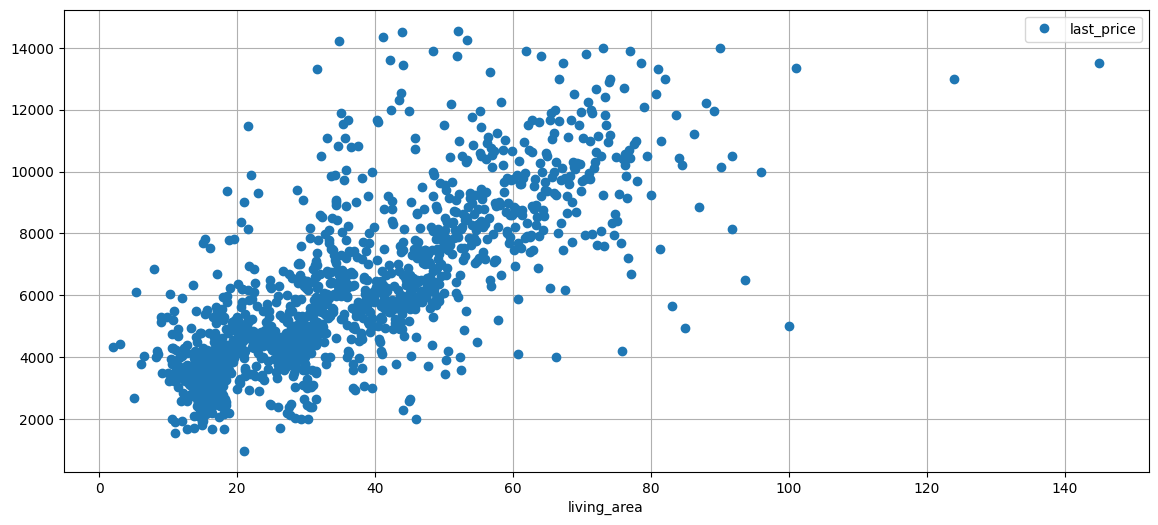

In [250]:
data_pivot = data.pivot_table(index='living_area', values='last_price')
data_pivot.plot(grid=True, figsize=(14, 6), style='o');

#Выведем корреляцию Пирсона. Проверим взаимосвязь.

print('Корреляцию Пирсона:', data['living_area'].corr(data['last_price']))

**Вывод:** До 50кв.м. жилая площадь от общей площади не сильно отличается по графику. На 50кв.м. не сильно "разгуляешься" и не жилую площадь требуется сокращать до минимума. Так же вряд ли там будет больше кол-во комнат. По этому Корреляцию Пирсона уже меньше.

* Построим график зависимость цены от площади кухни.

Корреляцию Пирсона: 0.49740222740695583


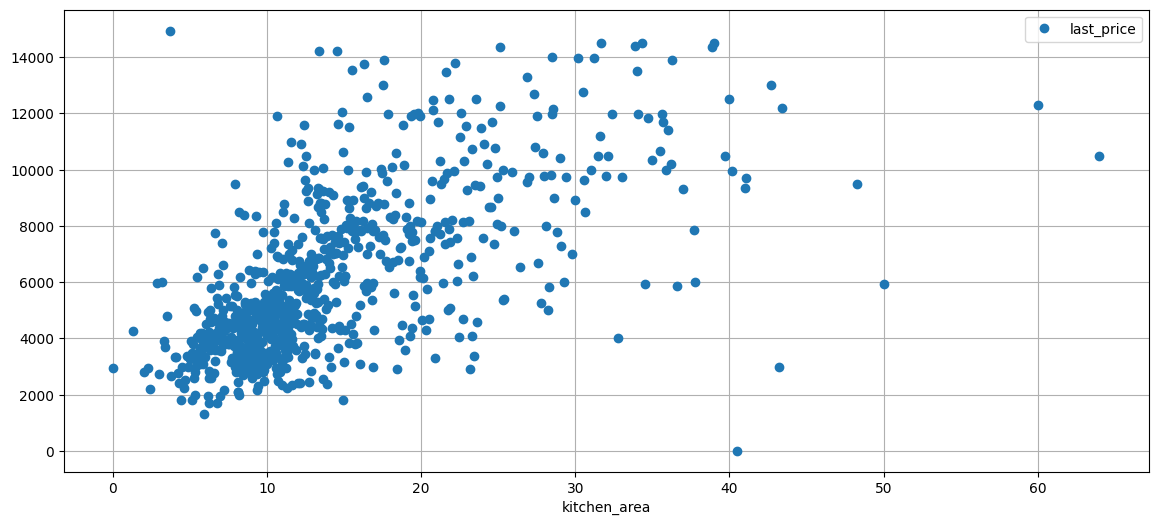

In [251]:
data_pivot = data.pivot_table(index='kitchen_area', values='last_price')
data_pivot.plot(grid=True, figsize=(14, 6), style='o');

#Выведем корреляцию Пирсона. Проверим взаимосвязь.

print('Корреляцию Пирсона:', data['kitchen_area'].corr(data['last_price']))

**Вывод:** По корреляцию Пирсона видно, что влияние на цену от площади кухни практически нет. Все таки при продажи квартиры акцент больше делают на общую площадь. 

* По данным `floor_type` построим круговую диаграмму, которая покажет влияние на стоимость в процентах от типа этажа.

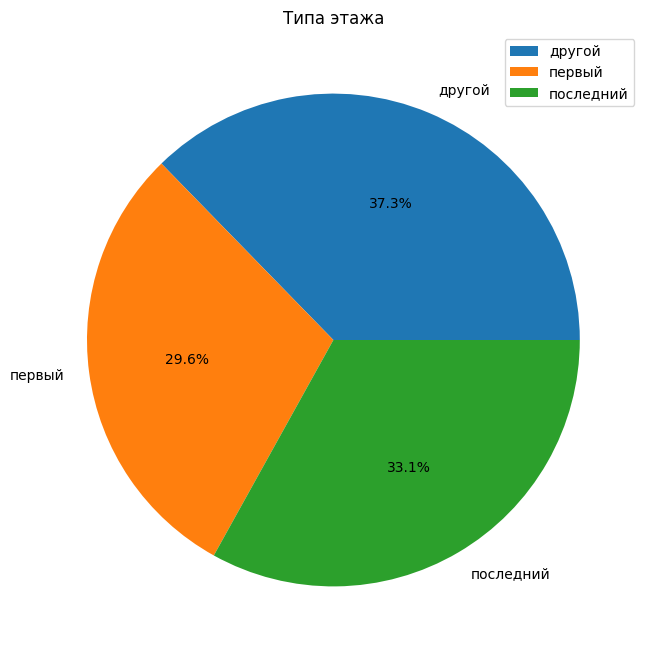

In [264]:
data_pivot = data.pivot_table(index= 'floor_type' , values='last_price')

data_pivot.plot(y = 'last_price', kind='pie', figsize=(8,8), autopct='%1.1f%%', fontsize=10);
plt.title('Типа этажа');
plt.ylabel('');

**Вывод:** По диаграмме видно, что стоимость выше у квартир, которые находиться на последних этажах. В целом тут сложно оценивать ситуацию. Возможно, наличия или отсутствия лифта сыграла бы свою роль. Но таких данных у нас нет, потому оставим как есть.

* Построим график, который покажет влияние на стоимость объекта от дня недели публикации.

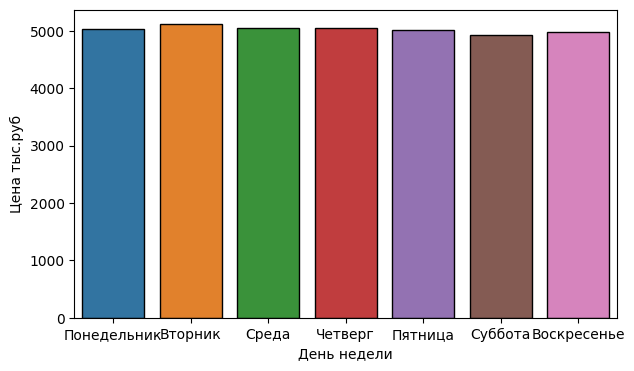

In [253]:
fig, axes = plt.subplots(figsize=(7, 4))

sns.barplot(x = day_week, y = data['last_price'], ec='black', ci=None,
            order= ["Понедельник","Вторник", "Среда", "Четверг", "Пятница", "Суббота","Воскресенье"]);

plt.ylabel('Цена тыс.руб');
plt.xlabel('День недели');

**Вывод:** День недели, ни как не влияет на стоимость объекта.

* Построим график, который покажет влияние на стоимость объекта от месяца публикации.

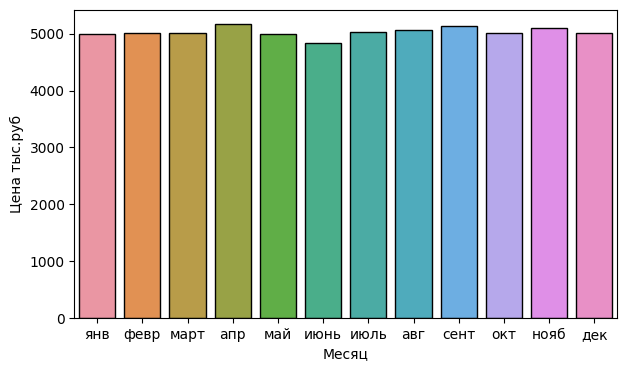

In [254]:
fig, axes = plt.subplots(figsize=(7, 4))

sns.barplot(x = date_month_name, y = data['last_price'], ec='black', ci=None,
           order= ["янв","февр", "март", "апр", "май", "июнь","июль", "авг", "сент", "окт", "нояб", "дек"]);

plt.ylabel('Цена тыс.руб');
plt.xlabel('Месяц');

**Вывод:** Так же, как и день недели, ни как не влияет на стоимость объекта.

* Построим график, который покажет влияние на стоимость объекта от года публикации.

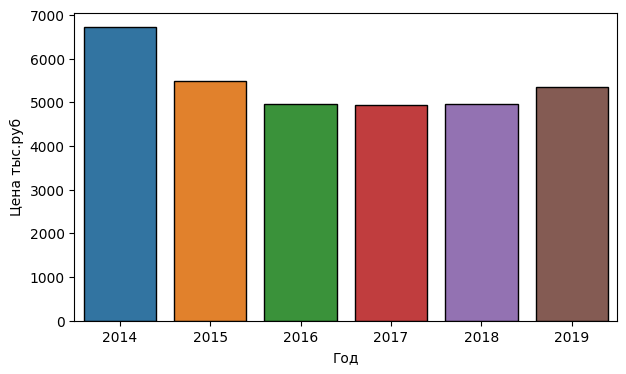

In [255]:
fig, axes = plt.subplots(figsize=(7, 4))

sns.barplot(x =data['year'], y = data['last_price'], ec='black', ci=None);

plt.ylabel('Цена тыс.руб');
plt.xlabel('Год');

**Вывод:** Четырнадцатый год показывает высокие цены на недвижимость и резкий спад в пятнадцатом году практически на 1/3. В 2014г. был очень сильный спрос на недвижимость. Произошедшие события 2015 показывают, что стоимость жилья сильно упала и оставил за собой хвост до 2019, где произошла не большая коррекция и цены подросли.

#### Найдем 10 населённых пунктов с самым большим количеством объявлений и посмотрим на среднюю цену 1кв.м.

In [256]:
#Сделаем таблицу с кол-ом объявлений и средней ценой на 1кв.м.

count_mean_price_cqm = data.pivot_table(index = 'locality_name', values = 'price_sqm', aggfunc = ['count','mean'])

In [257]:
#Переименуем столбцы.

count_mean_price_cqm.columns = ['count','mean']

In [258]:
#Отсортируем и выведем 10 населённых пунктов с большим кол-ом объявлений. По убыванию. 

count_mean_price_cqm.sort_values('count', ascending=False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,14045,107.378908
поселок Мурино,552,85.628994
поселок Шушары,437,78.517082
Всеволожск,390,67.161146
Пушкин,339,101.206418
Колпино,336,75.369846
поселок Парголово,326,90.332168
Гатчина,303,68.974035
деревня Кудрово,299,92.472977


**Вывод:** По количеству объявлений тут, конечно же, лидирует Санкт-Петербург с 14045 объявлений и средней ценой 107 тыс.руб.
С меньшим кол-ом объявлений всего 339, но несильно отличающейся ценой 101 тыс.руб. город Пушкин. На последнем же месте в данной 10-е город Выборг с кол-ом объявлений 222 и ценой 58 тыс.руб. Оно и понятно: в Выборге общая численность жителей на 2021 год составляет 74 тысячи человек, т.к. в Санкт-Петербурге 4,991 миллиона, где кол-во объявлений  и различие жилья и спроса будет больше.

#### Посмотрим на среднюю цену зависящую от расстояния до центра города. 

In [259]:
# Сделаем срез по Санкт-Петербург и найдем среднюю цену до центра.

price_centr_spb = data.query('locality_name == "Санкт-Петербург"')\
    .pivot_table(index='city_centers_nearest', values= 'last_price', aggfunc='mean')

(0.0, 30.0)

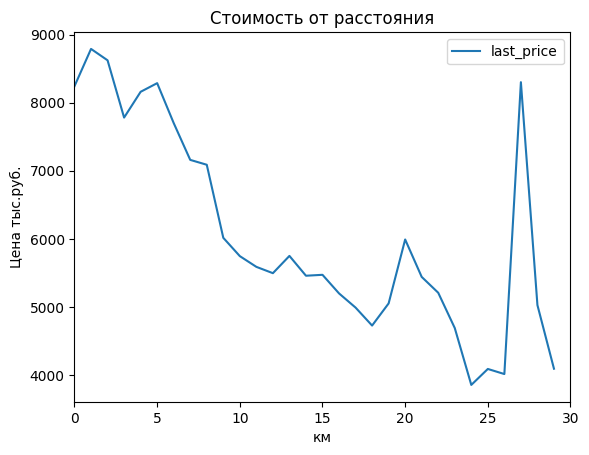

In [260]:

price_centr_spb.plot();
plt.title('Стоимость от расстояния');
plt.ylabel('Цена тыс.руб.');
plt.xlabel('км');
plt.xlim(0, 30)

**Вывод** Как исследовало ожидать чем ближе к центру, тем дороже стоимость жилья. Есть и не большие просадки. Начиная уже где-то от 8 км, мы наблюдаем, что стоимость становиться плавно снижается, но уже после 25 км идет резкий скачек, это город Пушкин, где цены не сильно отличаются от Питера. Как мы выявили уже ранее.

### Общий вывод

**Задачи данного исследовния.**
1. Изучить следующие параметры объектов:
* общая площадь
* жилая площадь
* площадь кухни
* цена объекта
* количество комнат
* высота потолков
* этаж квартиры
* тип этажа квартиры («первый», «последний», «другой»);
* общее количество этажей в доме;
* расстояние до центра города в метрах;
* расстояние до ближайшего аэропорта;
* расстояние до ближайшего парка;
* день и месяц публикации объявления.
2. Изучите, как быстро продавались квартиры
3. Изучить какие факторы больше всего влияют на общую (полную) стоимость объекта
4. Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра.
5. Изучить как стоимость объектов зависит от расстояния до центра города.
-------------------------------------------------------------------------------------------------------------------------------

1. И так мы изучили гистограммы каждого объекта, как показываю нам графики, в среднем мы видим объявления одно-двухкомнатных-квартир с общей площадью 30-50 кв.м., с жилой площадью 18-30 кв.м., площади кухонь 9 кв.м. и высота потолков в 2.6 м. Квартиры при этом находятся чаще всего в пятиэтажных домах. Чуть меньше объявлений в девятиэтажных домах. Больше всего квартир на этажах "других". В радиусе полукилометра от домов располагаются парки. До центра города в среднем 16 км, а до аэродрома-25км. Стоимость квартир варьируется от 3000 до 6000 тыс.руб

Объявления обычно публикуют на сайт в будние дни каждого месяца. Продолжительность до снятия 45, 60 и 90 дней диктуются правилами сайта.


2. Обычно квартиры продаются в течение 100 дней. Но так же не стоит забывать о правилах сайта. Бесплатно размещение действует до 120 дней, после идет платная подписка. Поэтому объявления могут сниматься, т.к. закончился бесплатный период.

3. Исходя из нашего исследования рассмотрим те факторы которые больше всего влияют на стоимость объекта. 

* Первое что можно выделить это общая площадь объекта, это точно основной показатель который напрямую влияет на стоимость. Корреляцию Пирсона в данном случаии показал нам  0.65.  
* Зависещий от первого это количество комнат, чем больше комнат тем дороже жилье. 
* Так же стоимоть квартиры поднимается когда она находиться на послднем этаже.
* Не мало важным фактором стоимости жилья является удаленость от центра города. В пределах 8 км от центра, стоимость на порядок выше.
* Ситуация на рынке так же может сильно повлиять на стоимость объекта, что показывает нам 2014 и 2015 год.

4. По числу объявлений выделяется Санкт-Питербург с количеством объявлений в 14045 и средней ценой 107 тыс.руб за 1кв.метр. далее поселок Мурино с 552 объявлениями и 85 тыс.руб за 1кв.метр, следом поселок Шушары 437 объявлений и 78 тыс.руб, за ним Всеволожск	390 объявлений 67 тыс.руб, Пушкин 339 объявлений 101 тыс.руб, Колпино 336 объявлений 75 тыс.руб, поселок Парголово 326 объявлений 90 тыс.руб, Гатчина 303 объявлений 68 тыс.руб, деревня Кудрово 299 объявлений 92 тыс.руб, Выборг 222 объявлений 58 тыс.руб. Санкт-Петербург лидирует т.к. в нем 4,991 миллиона жителей, где кол-во объявлений и различие жилья и спроса будет больше.

5. Изучая стоимость, зависящая от расстояния до центра города, мы наблюдаем, что в самом центре стоимость на порядок выше. Примерно посл 8 км. от центра идет плавное снижение цены, но ближе к 25 км цена вновь взвивается вверх. Это г. Пушкин где цена чуть меньше Питера 101 тыс.руб за кв.м. против 107 тыс.руб. 

В целом мы можем сказать, что на стоимость сильно влияют параметры объекта: общая площадь, жилая площадь, высота потолков, количество комнат и т.д. Так же не мало важный фактор расположения квартиры - центр это или область наличия поблизости водоемов или парков, как далеко находиться аэропорт. И внешняя ситуация на рынке.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод